In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install mplsoccer
from mplsoccer import VerticalPitch
from bs4 import BeautifulSoup
import json
import time
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.8 MB/s eta 0:00:00


In [2]:
url = 'https://understat.com/player/'
print('Common Player IDs: Salah - 1250; Haaland - 1031; Rashford - 556; Saka - 7322; Watkins - 8865')
match = str(input('Please Enter the Player ID To Visualize:'))
link = url + match

Common Player IDs: Salah - 1250; Haaland - 1031; Rashford - 556; Saka - 7322; Watkins - 8865
Please Enter the Player ID To Visualize:556


In [3]:
res = requests.get(link)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [4]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22AML\x22,\x22games\x22\x3A\x223\x22,\x22goals\x22\x3A\x220\x22,\x22shots\x22\x3A\x220\x22,\x22time\x22\x3A\x22246\x22,\x22xG\x22\x3A\x220\x22,\x22assists\x22\x3A\x220\x22,\x22xA\x22\x3A\x221.3784195184707642\x22,\x22key_passes\x22\x3A\x223\x22,\x22season\x22\x3A\x222024\x22,\x22team\x22\x3A\x22Manchester\x20United\x22,\x22yellow\x22\x3A\x220\x22,\x22red\x22\x3A\x220\x22,\x22npg\x22\x3A\x220\x22,\x22npxG\x22\x3A\x220\x22,\x22xGChain\x22\x3A\x221.5203445553779602\x22,\x22xGBuildup\x22\x3A\x220.6663750410079956\x22\x7D,\x7B\x22position\x22\x3A\x22FW\x22,\x22games\x22\x3A\x2233\x22,\x22goals\x22\x3A\x227\x22,\x22shots\x22\x3A\x2262\x22,\x22time\x22\x3A\x222292\x22,\x22xG\x22\x3A\x227.661536030471325\x22,\x22assists\x22\x3A\x222\x22,\x22xA\x22\x3A\x222.390

In [5]:
strings = scripts[3].string

In [6]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2259682\\x22,\\x22minute\\x22\\x3A\\x2228\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.909000015258789\\x22,\\x22Y\\x22\\x3A\\x220.5590000152587891\\x22,\\x22xG\\x22\\x3A\\x220.44006800651550293\\x22,\\x22player\\x22\\x3A\\x22Marcus\\x20Rashford\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22556\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222015\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x22348\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Arsenal\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222016\\x2D02\\x2D28\\x2018\\x3A05\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2259684\\x22,\\x22minute\\x22\\x3A\\x2231\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x22

In [7]:
#strip symbols
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [8]:
data

[{'id': '59682',
  'minute': '28',
  'result': 'Goal',
  'X': '0.909000015258789',
  'Y': '0.5590000152587891',
  'xG': '0.44006800651550293',
  'player': 'Marcus Rashford',
  'h_a': 'h',
  'player_id': '556',
  'situation': 'OpenPlay',
  'season': '2015',
  'shotType': 'RightFoot',
  'match_id': '348',
  'h_team': 'Manchester United',
  'a_team': 'Arsenal',
  'h_goals': '3',
  'a_goals': '2',
  'date': '2016-02-28 18:05:00',
  'player_assisted': None,
  'lastAction': 'None'},
 {'id': '59684',
  'minute': '31',
  'result': 'Goal',
  'X': '0.9290000152587891',
  'Y': '0.48200000762939454',
  'xG': '0.4395659863948822',
  'player': 'Marcus Rashford',
  'h_a': 'h',
  'player_id': '556',
  'situation': 'OpenPlay',
  'season': '2015',
  'shotType': 'Head',
  'match_id': '348',
  'h_team': 'Manchester United',
  'a_team': 'Arsenal',
  'h_goals': '3',
  'a_goals': '2',
  'date': '2016-02-28 18:05:00',
  'player_assisted': 'Jesse Lingard',
  'lastAction': 'Cross'},
 {'id': '60581',
  'minute':

In [9]:
id = []
minute = []
result = []
x = []
y = []
xG = []
player = []
h_a = []
player_id = []
situation = []
season = []
shotType = []
match_id = []
date = []

In [10]:
for index in range(len(data)):
  id.append(data[index]['id'])
  minute.append(data[index]['minute'])
  result.append(data[index]['result'])
  x.append(data[index]['X'])
  y.append(data[index]['Y'])
  xG.append(data[index]['xG'])
  player.append(data[index]['player'])
  h_a.append('H')
  player_id.append(data[index]['player_id'])
  situation.append(data[index]['situation'])
  season.append(data[index]['season'])
  shotType.append(data[index]['shotType'])
  match_id.append(data[index]['match_id'])
  date.append(data[index]['date'])

In [11]:
col_names = ['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id', 'situation', 'season', 'shotType', 'match_id', 'date']
df = pd.DataFrame([id,minute,result, x, y, xG, player, h_a, player_id, situation, season, shotType, match_id, date],index=col_names)
df = df.T
df = df.dropna()
df["season"] = df["season"].astype(str)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)
df['xG'] = df['xG'].astype(float)
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [12]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,date
0,59682,28,Goal,90.900002,55.900002,0.440068,Marcus Rashford,H,556,OpenPlay,2015,RightFoot,348,2016-02-28 18:05:00
1,59684,31,Goal,92.900002,48.200001,0.439566,Marcus Rashford,H,556,OpenPlay,2015,Head,348,2016-02-28 18:05:00
2,60581,50,BlockedShot,83.599998,47.299999,0.095245,Marcus Rashford,H,556,OpenPlay,2015,LeftFoot,368,2016-03-06 20:00:00
3,60254,15,Goal,90.000000,64.300003,0.341362,Marcus Rashford,H,556,OpenPlay,2015,RightFoot,382,2016-03-20 20:00:00
4,60274,54,BlockedShot,93.599998,41.900002,0.432870,Marcus Rashford,H,556,OpenPlay,2015,RightFoot,382,2016-03-20 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,567754,6,BlockedShot,94.000000,66.699997,0.114501,Marcus Rashford,H,556,OpenPlay,2023,LeftFoot,22172,2024-03-09 12:30:00
568,567767,35,Goal,88.500000,50.000000,0.761169,Marcus Rashford,H,556,Penalty,2023,RightFoot,22172,2024-03-09 12:30:00
569,571105,41,SavedShot,72.599998,62.599998,0.016251,Marcus Rashford,H,556,OpenPlay,2023,RightFoot,22187,2024-03-30 20:00:00
570,573915,17,MissedShots,96.099998,63.000000,0.080639,Marcus Rashford,H,556,OpenPlay,2023,LeftFoot,22215,2024-04-13 16:30:00


In [19]:
#INSERT CODE HERE THAT LETS USER:
df['date'] = pd.to_datetime(df['date'])
# Create separate DataFrames for each season based on date ranges
df_22_23 = df[(df['date'] >= '2022-08-01') & (df['date'] <= '2023-06-01')]
df_23_24 = df[(df['date'] >= '2023-08-01') & (df['date'] <= '2024-06-01')]
df_24_25 = df[(df['date'] >= '2024-08-01') & (df['date'] <= '2025-06-01')]

In [14]:
popup = input('Please select which season(s) for observation: Choose 1 for 22/23, 2 for 23/24, 3 for 24/25, or 0 for a career summary:')
for choice in popup:
  if popup == '0':
    df = df
    season_text = f'All Shots in the Premier League (Career)'
  elif popup == '1':
    df = df_22_23
    season_text = f'All Shots in the Premier League 22/23'
  elif popup == '2':
    df = df_23_24
    season_text = f'All Shots in the Premier League 23/24'
  elif popup == '3':
    df = df_24_25
    season_text = f'All Shots in the Premier League 24/25'
  else:
    print('Invalid Input')

Please select which season(s) for observation: Choose 1 for 22/23, 2 for 23/24, 3 for 24/25, or 0 for a career summary:0


In [15]:
#Summary Statistics
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].astype(float).sum()
xG_pershot = total_xG / total_shots
points_avg_d = df['X'].mean()
actual_avg_d = 120 - (df['X'] * 1.2).mean()   #soccer pitch is 120yds
print(points_avg_d, actual_avg_d)

85.33776239248422 17.59468512901894


In [16]:
#Color/Font
background_color='#0C0D0E'
import matplotlib.font_manager as font_manager
font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

In [17]:
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

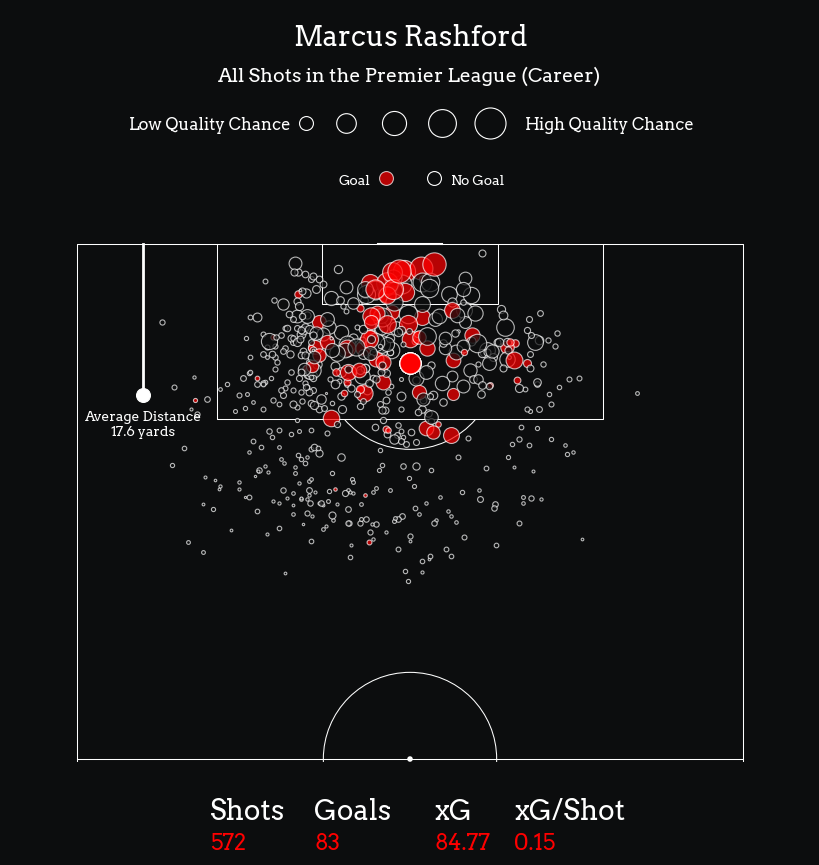

In [21]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)
ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(
    x=0.5,
    y=.85,
    s=df['player'].iloc[0],
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.text(
    x=0.5,
    y=.7,
    s=season_text,
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

#scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


#scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_d,
    s=100,
    color='white',
    linewidth=.8
)
#line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_d],
    color='white',
    linewidth=2
)

#text label for the average distance
ax2.text(
    x=90,
    y=points_avg_d - 4,
    s=f'Average Distance\n{actual_avg_d:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )

ax2.set_axis_off()

#axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xG:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xG_pershot:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()